#1. Regresión lineal múltiple para calidad del aire
#Air Quality Data Set
Descripción: Contiene las respuestas de un dispositivo multisensor de gas desplegado sobre el terreno en una ciudad italiana. Los promedios de respuestas por hora se registran junto con referencias de concentraciones de gas de un analizador certificado.

https://archive.ics.uci.edu/ml//datasets/Air+quality

Instancias: 93584

Atributos: 15

0. Fecha (DD / MM / AAAA)
1. Hora (HH.MM.SS)
2. Concentración real promedio por hora de CO en mg / m ^ 3 
3. PT08.S1 (óxido de estaño) 
4. Concentración de hidrocarburos no metánicos total promediada por hora real en microg / m ^ 3 
5. Concentración de benceno promediada por hora real en microg / m ^ 3 
6. PT08.S2 (titania) respuesta del sensor promediada por hora
7. Concentración de NOx promediada por hora real en ppb
8. PT08.S3 (óxido de tungsteno) respuesta del sensor promediada por hora 
9. Concentración verdadera de NO2 promediada por hora en microg / m ^ 3 
10. PT08.S4 (óxido de tungsteno) respuesta del sensor promediada por hora 
11. PT08.S5 (óxido de indio) respuesta del sensor promediada por hora 
12. Temperatura en ° C
13. Humedad relativa (%)
14. AH de humedad absoluta

#2.Autenticación Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#3. Importando módulos

In [ ]:
import ___ as pd
import os
import plotly.express as ___
import plotly.io as ___
import ____ as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn._____ import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA

#4. Lectura de archivo de calidad de aire

In [ ]:
path = r'/content/drive/Shareddrives/Data Science para Geociencias/6. Métodos de ML/6.1 Regresión lineal múltiple'
name = 'AirQualityUCI.xlsx'

In [ ]:
path_file = os.path.join(____,____)

In [ ]:
air_quality = pd.read_excel(_____)
air_quality.head()

In [ ]:
print('Número de instancias: %s'%len(air_quality))
print('Número de atributos: %s'%(air_quality.shape[1]))

#5. Limpieza de datos



**Modificando la columna de fecha: Unir Date y Time para formar la columna Fecha**

In [ ]:
air_quality.loc[:,'Fecha'] = pd.to_datetime(air_quality.____.astype(str)+' '+air_quality.____.astype(str))
air_quality.drop(['Date','Time'], axis=1, inplace=True)

In [ ]:
# Ordenando las columnas para que Fecha quede al principio :)
air_quality = air_quality[['Fecha','CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','RH','AH','T']]
_____.head()

**Graficar Fecha vs T**

In [ ]:
fig=go.Figure()
fig.layout.template = "ggplot2" 
fig.add_scatter(x=air_quality[____], y=air_quality[____], mode='lines',name='T')
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))
pio.show(fig)

**Verificando si existen NaNs**

In [ ]:
print ('Conteo de valores faltantes: \n')
print (_____.isna().sum())


**Identificación y reemplazo de los -200 con la media por columna**

**No olvides NO tomar en cuenta la columna de Fecha**

In [ ]:
for i in range(air_quality.shape[1]-1):
  _____.iloc[:,i+1] = air_quality.iloc[:,i+1].replace(to_replace=___, value=air_quality.iloc[:,i+1][air_quality.iloc[:,i+1]>0].____())

In [ ]:
fig=go.Figure()
fig.add_scatter(x=air_quality[____], y=air_quality[___], mode='lines',name='T')
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))
pio.show(fig)

**Escalamiento: estandarización**

**No olvides excluir la columna de Fecha**

In [ ]:
scale = StandardScaler()
air_quality.iloc[:,1:-1] = scale.______(air_quality.iloc[:,1:-1])

In [ ]:
_____.head()

#6. Hold out validation para series de tiempo


**Dividiendo el 80% de nuestros datos para entrenamiento y el 20% para validación, recuerda que en series de tiempo SI IMPORTA EL ORDEN**

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(air_quality.iloc[:,1:-1].to_numpy(), air_quality.iloc[:,-1].to_numpy(), test_size = ____, shuffle=____)

In [ ]:
print(f'Dimension de los datos de entrenamiento {____.shape}')
print(f'Dimension de los datos de prueba {____.shape}')

#7. Modelo de inferencia: Regresión lineal múltiple

**Instanciando regresor**

In [ ]:
linreg = LinearRegression(normalize=False)

**Ajuste con datos de entrenamiento**

In [ ]:
linreg = linreg.fit(____, ____)

## 7.1 Infieriendo temperaturas de prueba 

In [ ]:
preds = linreg.predict(___)

**Score de prueba**

In [ ]:
linreg.score(____, ____)

**MSE de prueba**

In [ ]:
mean_squared_error(____,____)

**Comparación entre groundtruth y predicción**

In [ ]:
n_train = int(0.8*air_quality.shape[0])
test_df =  air_quality.iloc[n_train:,:]
fig=go.Figure()
fig.add_scatter(x=test_df['Fecha'], y=Ytest, mode='lines',name='Ground Truth')
fig.add_scatter(x=test_df['Fecha'], y=_____, mode='lines',name='Predicted')
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))
pio.show(____)

**Visualización de residuales**

In [ ]:
fig=go.Figure()
fig.add_scatter(x=test_df['Fecha'], y=_____, mode='lines',name='Residuales', line=go.scatter.Line(color="green"))
fig.add_scatter(x=test_df['Fecha'], y=np.zeros((len(Ytest))), mode='lines',name='Linea Base', line=go.scatter.Line(color="gray"))
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))
pio.show(fig)

# 8. Modelo de inferencia con XGBoostRegressor

**Instanciando regresor**

In [ ]:
XGBR = XGBRegressor(normalize=False)

**Ajuste con los datos de entrenamiento**

In [ ]:
XGBR = XGBR.fit(____,____)

**Score de entrenamiento**

In [ ]:
XGBR.score(____,____)

## 8.1 Infiriendo temperaturas de prueba con XGBR

In [ ]:
preds = XGBR.predict(____)

**Score de prueba**

In [ ]:
XGBR.____(Xtest,Ytest)

**MSE de prueba**

In [ ]:
mean_squared_error(___,preds)

**Comparación entre groundtruth y predicción**

In [ ]:
fig=go.Figure()
fig.add_scatter(x=test_df['Fecha'], y=Ytest, mode='lines',name='Ground Truth')
fig.add_scatter(x=test_df['Fecha'], y=____, mode='lines',name='Predicted')
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))
pio.show(fig)

**Visualización de residuales**

In [ ]:
fig=go.Figure()
fig.add_scatter(x=test_df['Fecha'], y=_____, mode='lines',name='Residuales', line=go.scatter.Line(color="green"))
fig.add_scatter(x=test_df['Fecha'], y=np.zeros((len(Ytest))), mode='lines',name='Linea Base', line=go.scatter.Line(color="gray"))
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))
pio.show(fig)

# 9. Modelo de inferencia con ARIMA

**Cambiando el dataframe para que solo tengamos fecha y T**

In [ ]:
arimadf = air_quality.iloc[:,[0,-1]]
arimadf.head(10)

,Fecha,T
0,2004-03-10 18:00:00,13.600
1,2004-03-10 19:00:00,13.300
2,2004-03-10 20:00:00,11.900
3,2004-03-10 21:00:00,11.000
4,2004-03-10 22:00:00,11.150
5,2004-03-10 23:00:00,11.175
6,2004-03-11 00:00:00,11.325
7,2004-03-11 01:00:00,10.675
8,2004-03-11 02:00:00,10.650
9,2004-03-11 03:00:00,10.250


¿Es estacionaria? mean, variance y cov constantes en periodos de tiempo

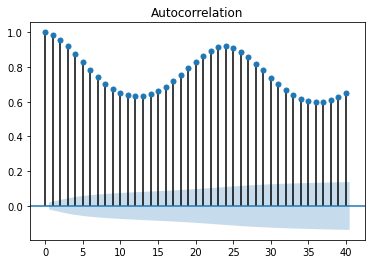

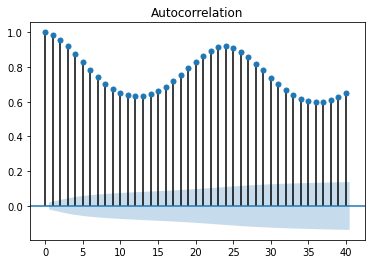

In [ ]:
plot_acf(arimadf.iloc[:,1])

**Convertir la serie a estacionaria Integrated(1)**

In [ ]:
arimadf_diff = air_quality.iloc[:,-1]
arimadf_diff.iloc[:] = arimadf_diff.iloc[:].diff(periods=1) 

In [ ]:
arimadf_diff = arimadf_diff[1:]

In [ ]:
plot_acf(____)

In [ ]:
fig=go.Figure()
fig.add_scatter(x=arimadf['Fecha'], y=arimadf_diff, mode='lines',name='', line=go.scatter.Line(color="green"))
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))
pio.show(fig)

In [ ]:
n_train = int(0.95*air_quality.shape[0]) 
n_test = air_quality.shape[0]-n_train
 
train_df = arimadf.iloc[:n_train,:]
test_df =  arimadf.iloc[n_train:,:]
train = train_df.iloc[:n_train,1].to_numpy()
test =  test_df.iloc[n_train:,1].to_numpy()

## 9.1 Inferencia de temperaturas de prueba



In [ ]:
model_arima = ARIMA(train,order=(10,1,10))

**Entrenamiento**

In [ ]:
model_arima_fit = model_arima.fit()

**Predicciones**

In [ ]:
preds = model_arima_fit.forecast(steps=____)[0]

**Visualización de los predichos vs. groundtruth**

In [ ]:
fig=go.Figure()
fig.add_scatter(x=test_df['Fecha'], y=test_df['T'], mode='lines',name='Ground Truth')
fig.add_scatter(x=test_df['Fecha'], y=_____, mode='lines',name='Predicted')
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))
pio.show(____)